# TASK 1: UNDERSTAND THE PROBLEM STATEMENT

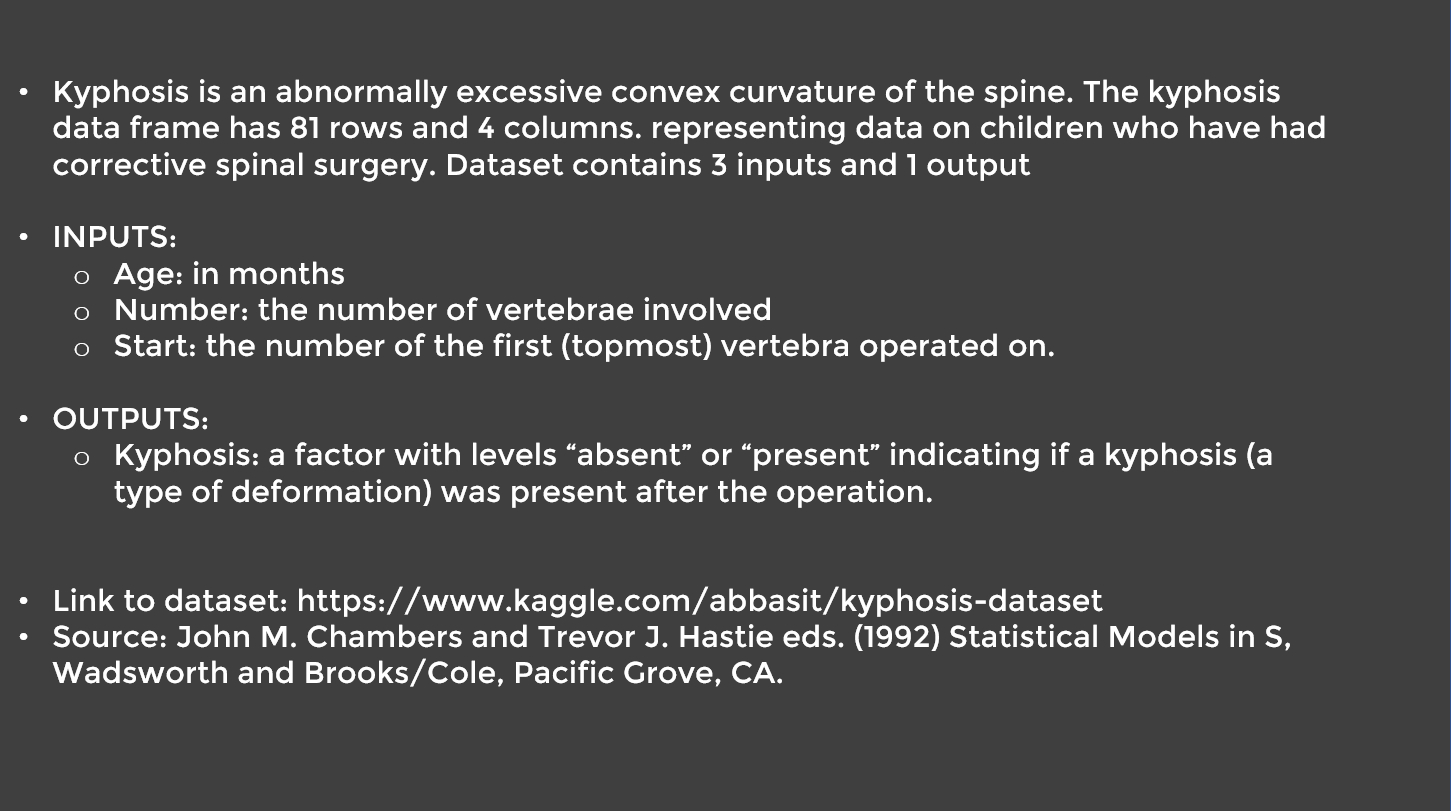

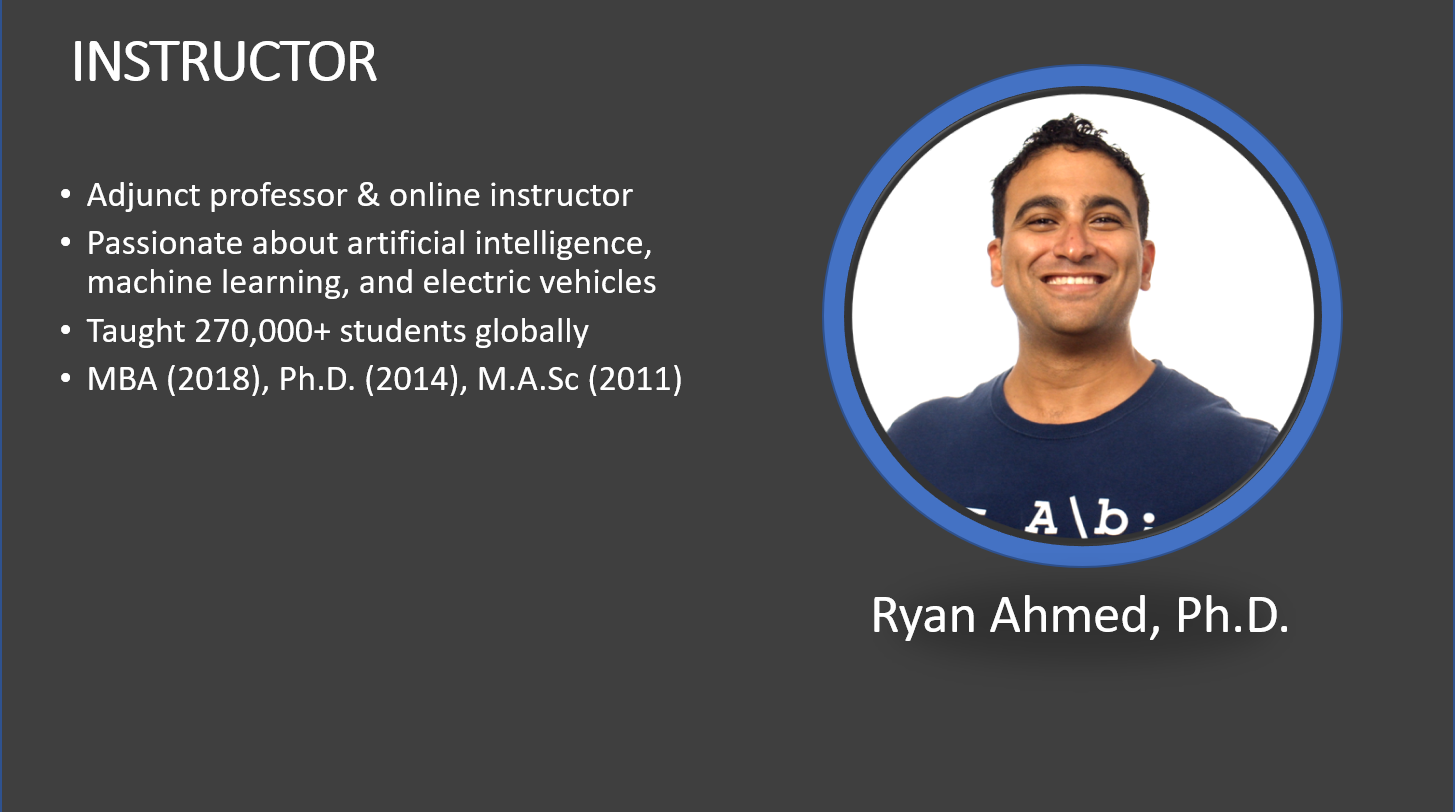

# TASK #2: IMPORT LIBRARIES AND DATASETS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [18]:
Kyphosis_df = pd.read_csv('kyphosis.csv')

In [19]:
Kyphosis_df

Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]

In [20]:
Kyphosis_df.tail()

Kyphosis  Age  Number  Start
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

In [21]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [22]:
print(f"Average Age: {Kyphosis_df['Age'].mean()/12}, Max Age: {Kyphosis_df['Age'].max()/12}, Min Age:{Kyphosis_df['Age'].min()/12}")

Average Age: 6.97119341563786, Max Age: 17.166666666666668, Min Age:0.08333333333333333


In [23]:
Kyphosis_df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

# TASK #3: PERFORM DATA VISUALIZATION

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [25]:
Kyphosis_df

Kyphosis  Age  Number  Start
0          0   71       3      5
1          0  158       3     14
2          1  128       4      5
3          0    2       5      1
4          0    1       4     15
..       ...  ...     ...    ...
76         1  157       3     13
77         0   26       7     13
78         0  120       2     13
79         1   42       7      6
80         0   36       4     13

[81 rows x 4 columns]

In [26]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [27]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [28]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<AxesSubplot: >

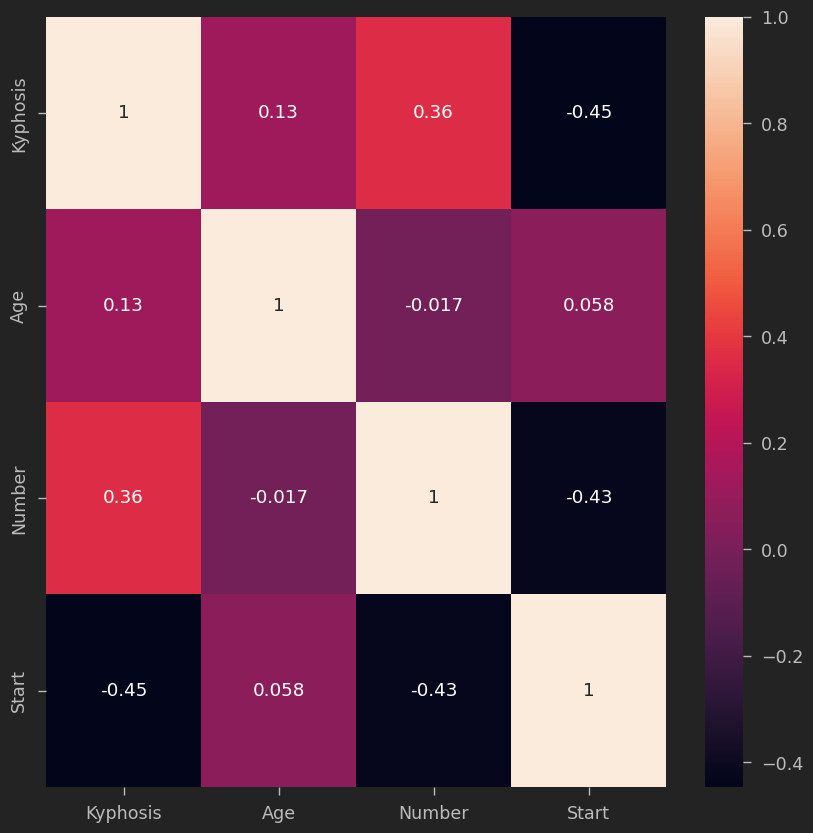

In [30]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(), annot=True)

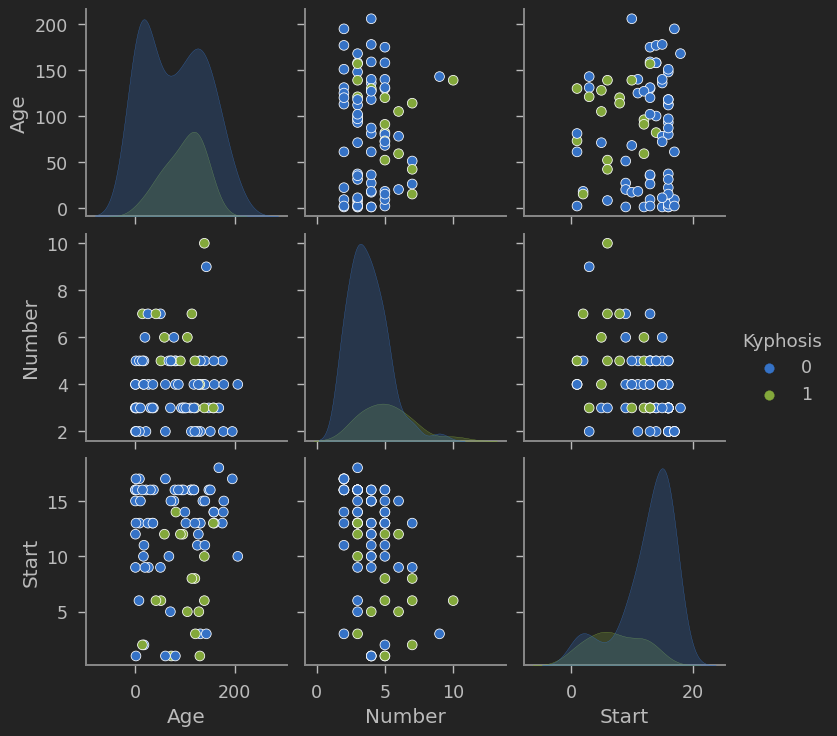

In [32]:
sns.pairplot(Kyphosis_df, hue="Kyphosis")

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the data countplot showing how many samples belong to each class**

<AxesSubplot: xlabel='Kyphosis', ylabel='count'>

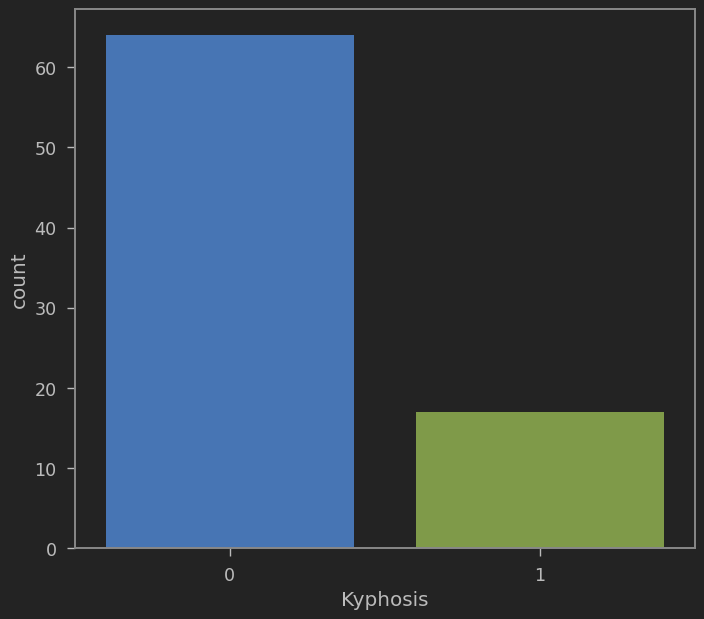

In [35]:
sns.countplot(x=Kyphosis_df["Kyphosis"])

# TASK #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [36]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(["Kyphosis"], axis=1)
y = Kyphosis_df["Kyphosis"]

In [37]:
X

Age  Number  Start
0    71       3      5
1   158       3     14
2   128       4      5
3     2       5      1
4     1       4     15
..  ...     ...    ...
76  157       3     13
77   26       7     13
78  120       2     13
79   42       7      6
80   36       4     13

[81 rows x 3 columns]

In [38]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
X_train.shape

(64, 3)

In [49]:
X_test.shape

(17, 3)

In [18]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# TASK #5: TRAIN A LOGISTIC REGRESSION CLASSIFIER MODEL

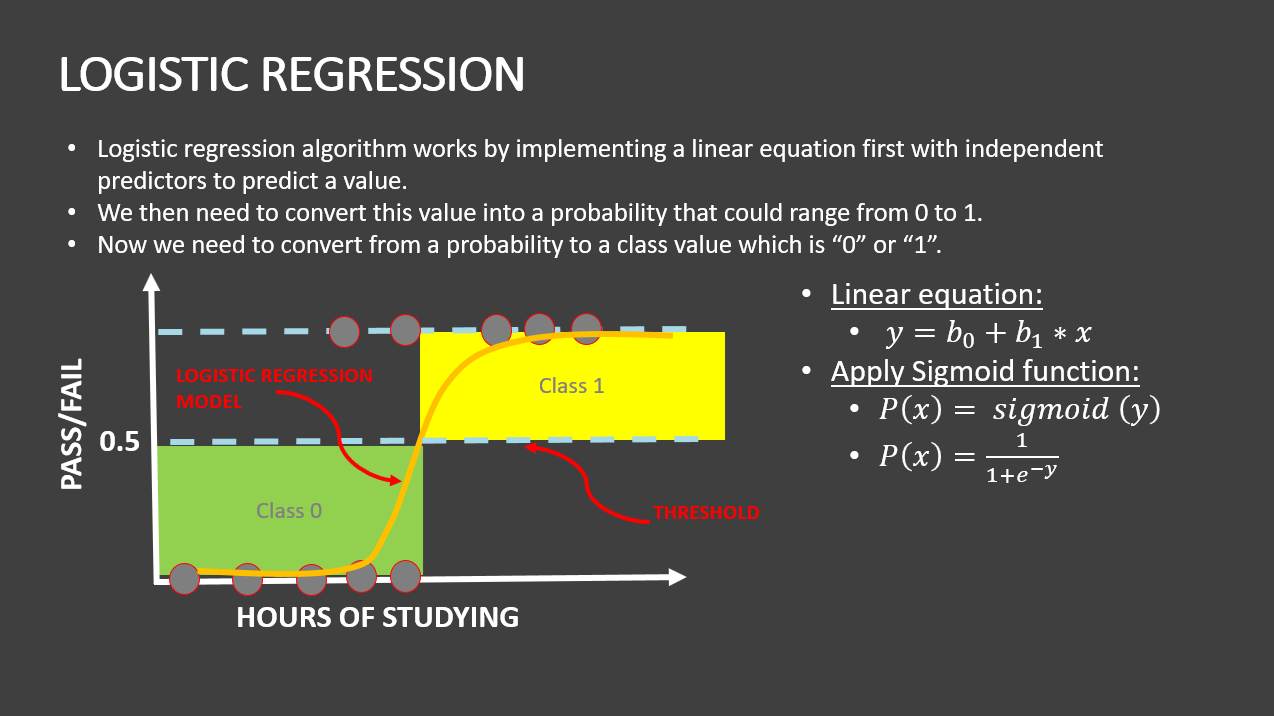

In [50]:
X_train.shape

(64, 3)

In [51]:
y_train.shape

(64,)

In [52]:
X_test.shape

(17, 3)

In [53]:
y_test.shape

(17,)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE 

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot: >

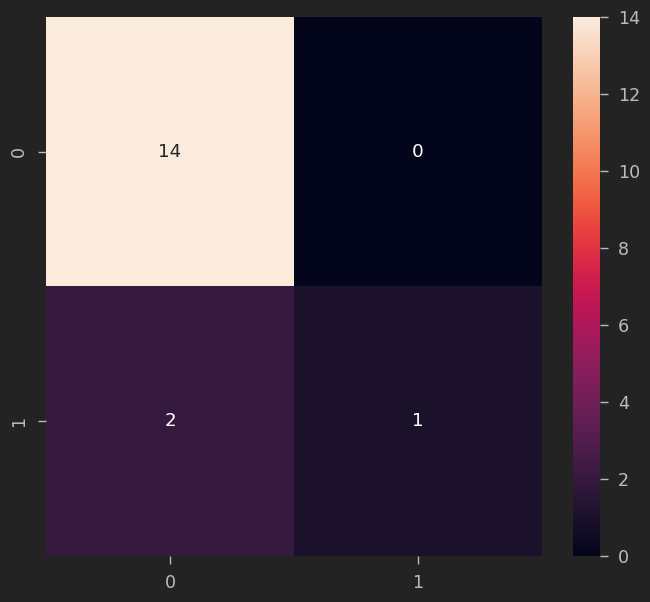

In [57]:
# Predicting the Test set results
y_predict_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [58]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.33      0.50         3

    accuracy                           0.88        17
   macro avg       0.94      0.67      0.72        17
weighted avg       0.90      0.88      0.86        17



# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND DECISION TREES AND RANDOM FOREST CLASSIFIER MODELS

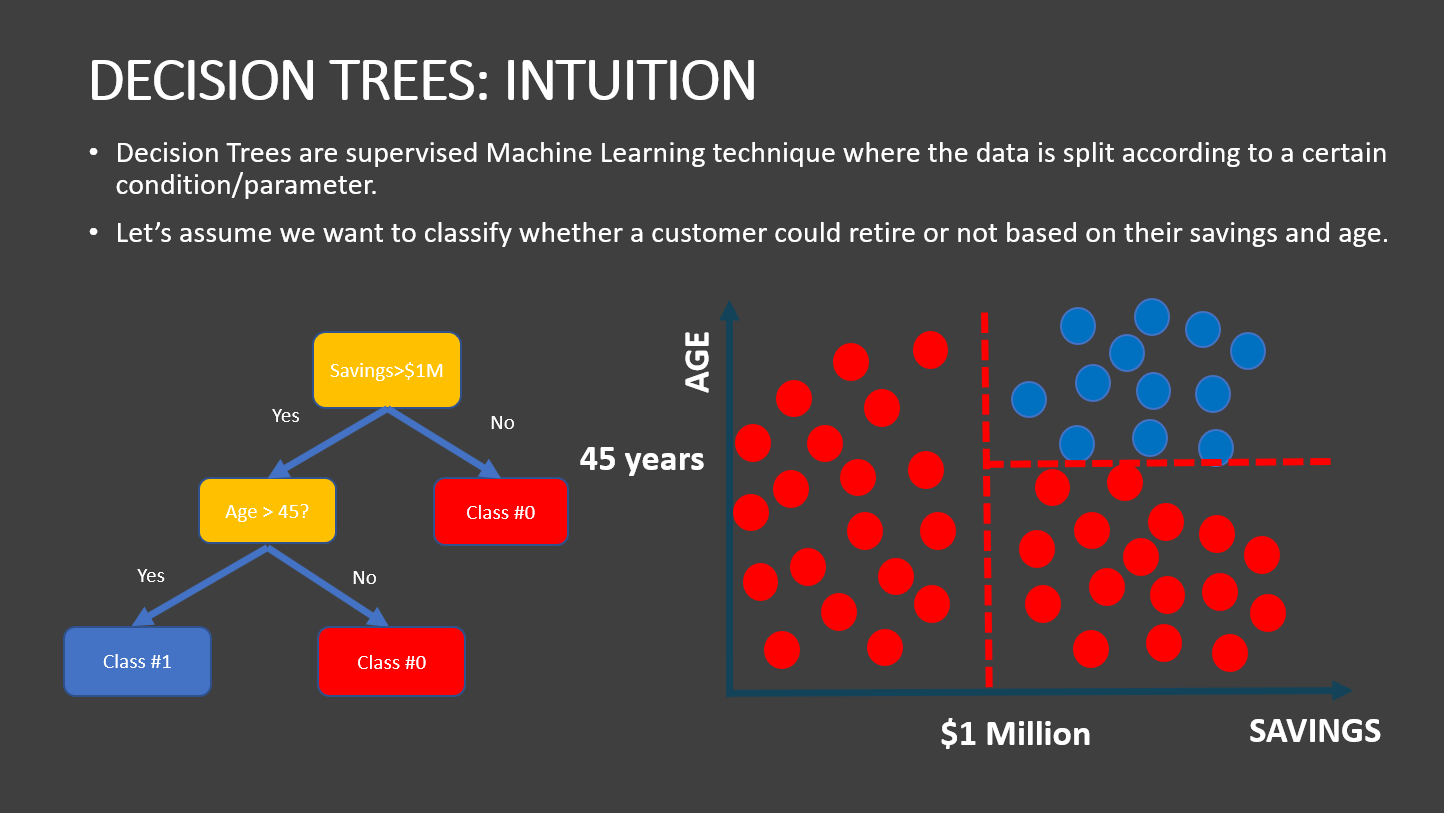

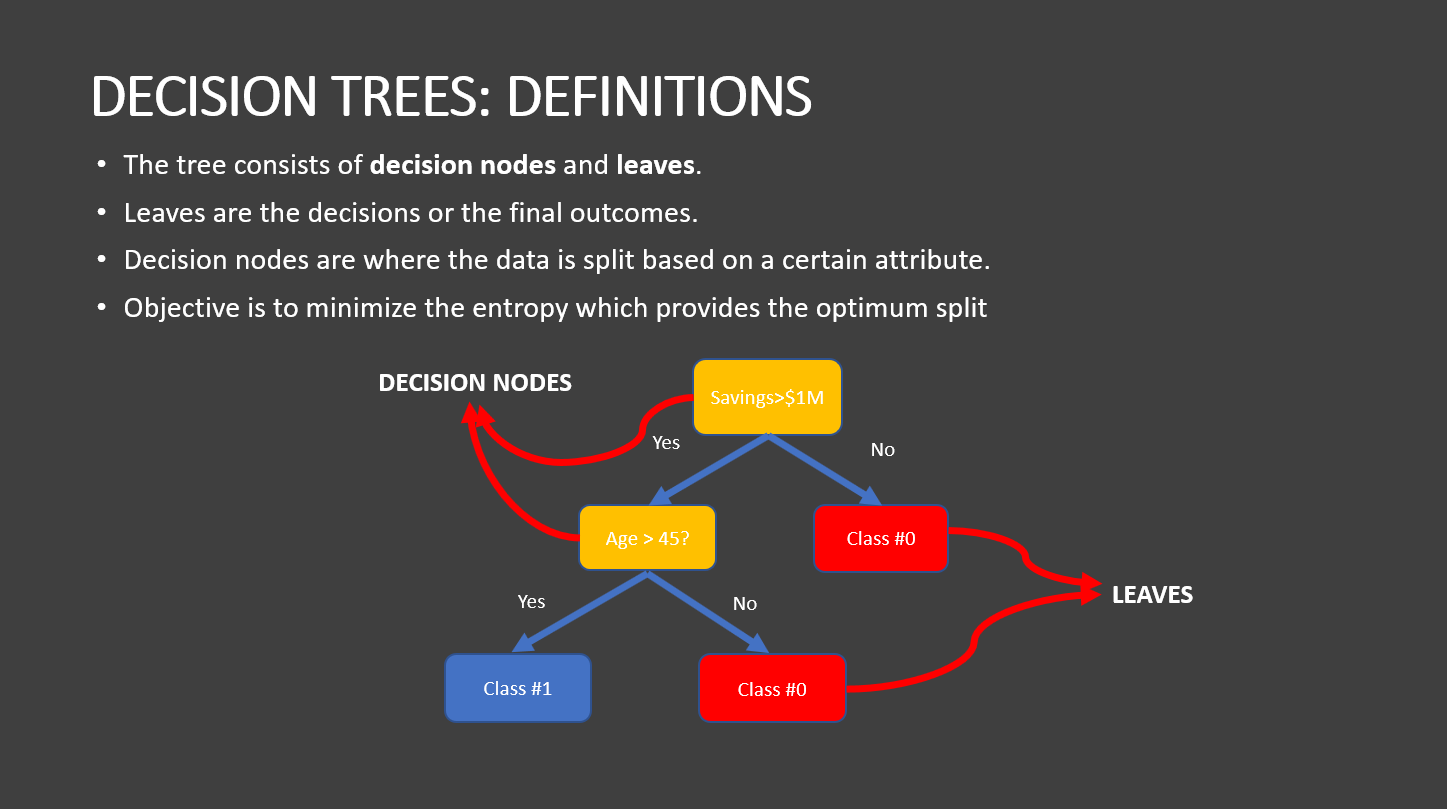

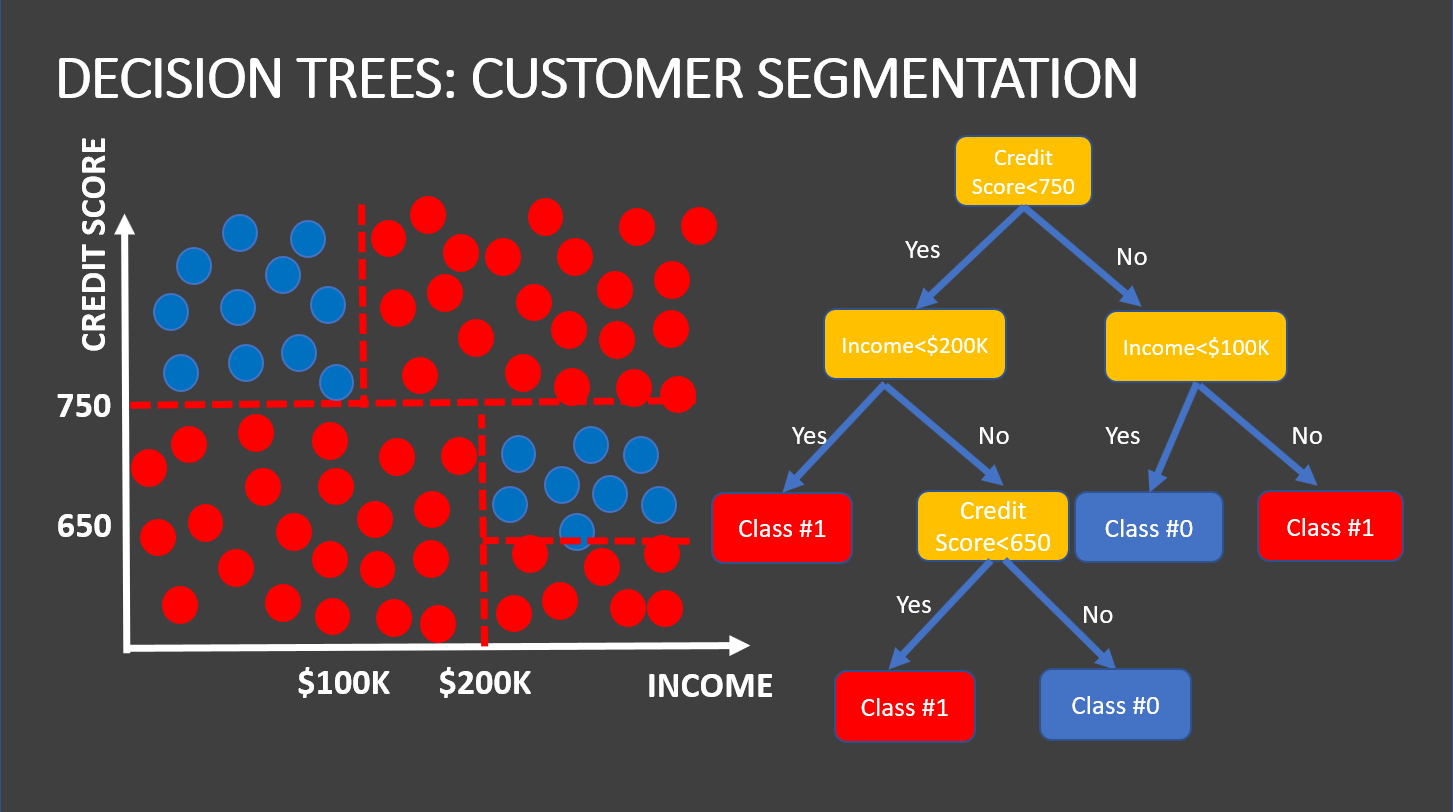

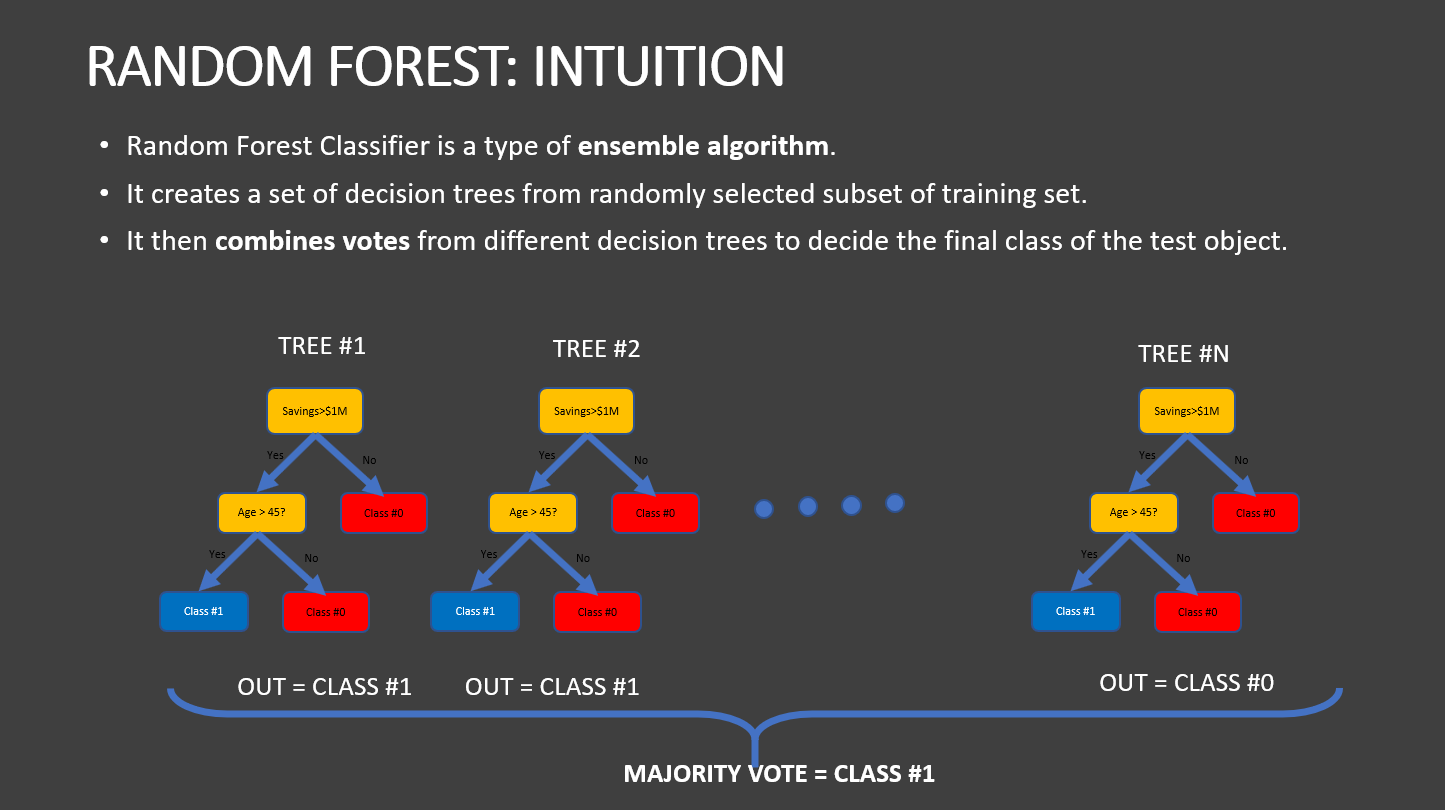

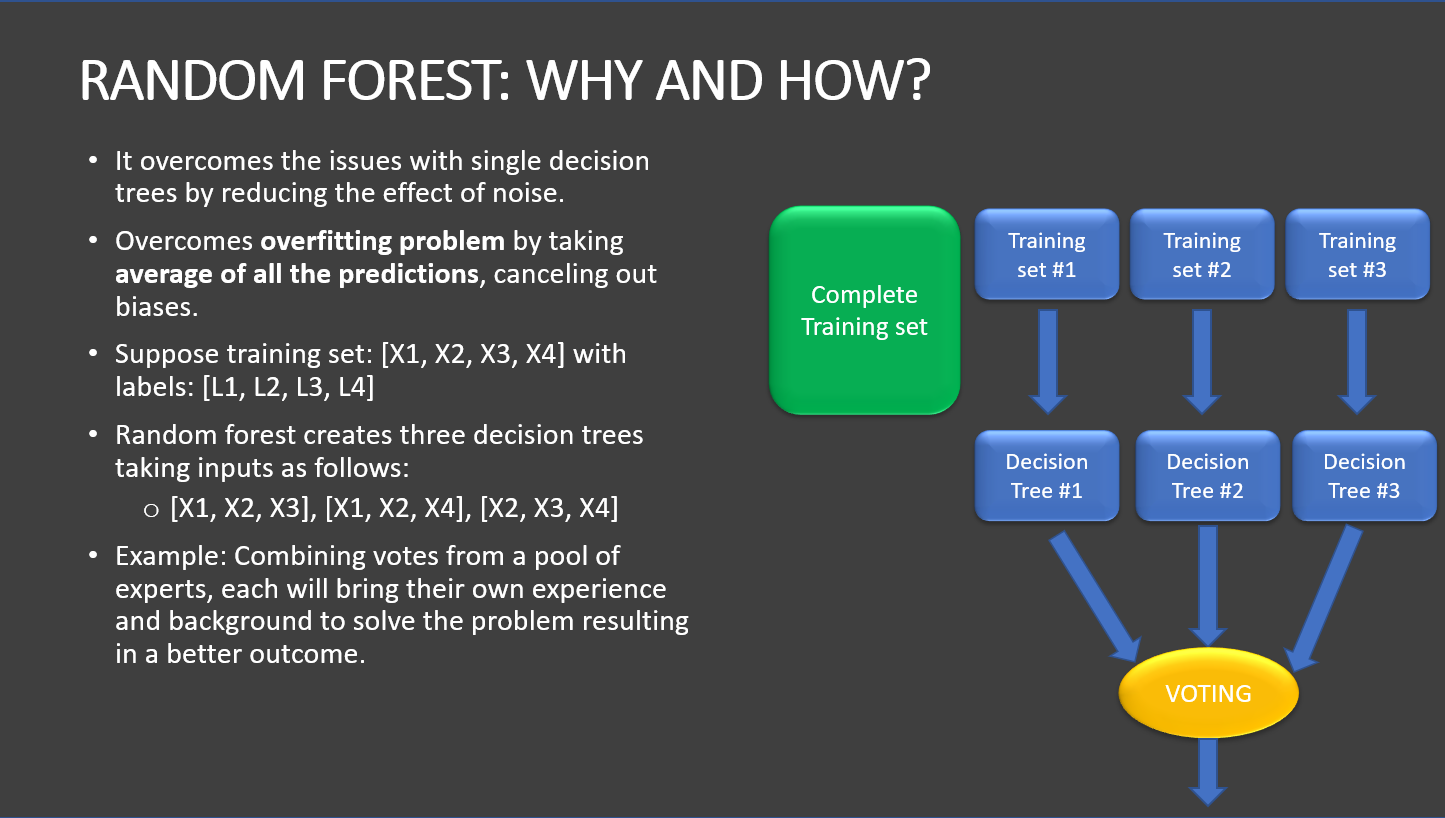

# TASK #8: IMPROVE THE MODEL 

In [60]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

<AxesSubplot: >

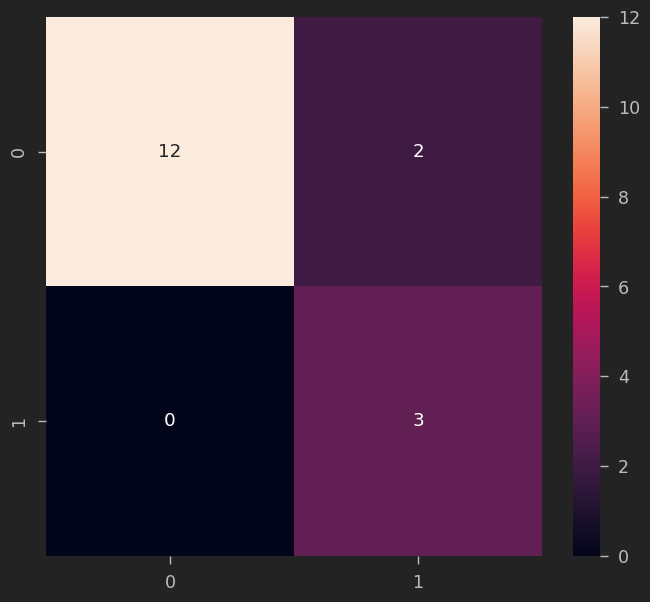

In [61]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [62]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.60      1.00      0.75         3

    accuracy                           0.88        17
   macro avg       0.80      0.93      0.84        17
weighted avg       0.93      0.88      0.89        17



In [63]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.514459
Age       0.278026
Number    0.207515


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Train a random forest classifier model and assess its performance**
- **Plot the confusion matrix**
- **Print the classification Report**


In [64]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

<AxesSubplot: >

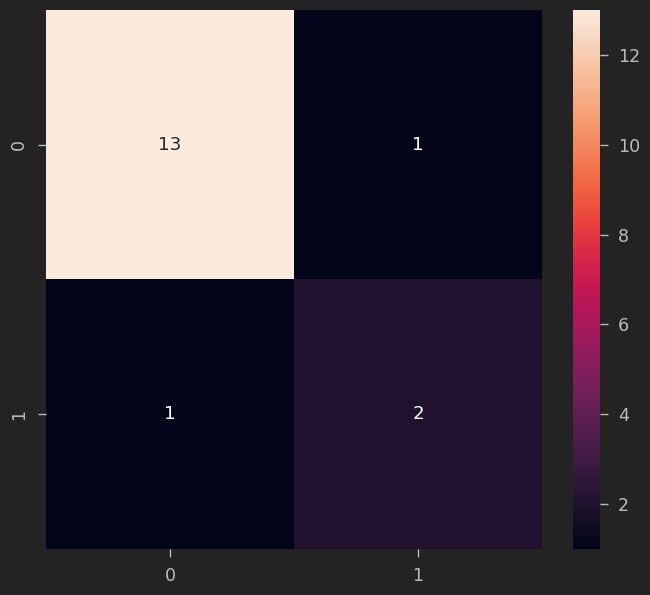

In [65]:
y_predict_test = random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [66]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.67      0.67      0.67         3

    accuracy                           0.88        17
   macro avg       0.80      0.80      0.80        17
weighted avg       0.88      0.88      0.88        17



# GREAT JOB! 

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **List the average, minimum and maximum age (in years) considered in this study using two different methods**

In [31]:
Kyphosis_df.describe()

Kyphosis         Age     Number      Start
count  81.000000   81.000000  81.000000  81.000000
mean    0.209877   83.654321   4.049383  11.493827
std     0.409758   58.104251   1.619423   4.883962
min     0.000000    1.000000   2.000000   1.000000
25%     0.000000   26.000000   3.000000   9.000000
50%     0.000000   87.000000   4.000000  13.000000
75%     0.000000  130.000000   5.000000  16.000000
max     1.000000  206.000000  10.000000  18.000000

In [32]:
Kyphosis_df['Age'].mean()/12

6.97119341563786

In [33]:
Kyphosis_df['Age'].min()/12

0.08333333333333333

In [34]:
Kyphosis_df['Age'].max()/12

17.166666666666668

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot the data countplot showing how many samples belong to each class**

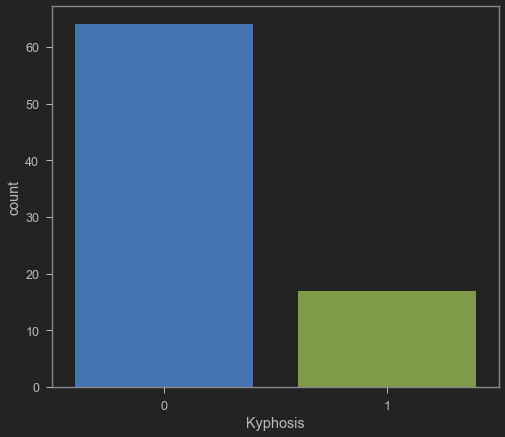

In [35]:
sns.countplot(x = Kyphosis_df['Kyphosis'], label = "Count");

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Train a random forest classifier model and assess its performance**
- **Plot the confusion matrix**
- **Print the classification Report**


              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.00      0.00      0.00         6

    accuracy                           0.59        17
   macro avg       0.31      0.45      0.37        17
weighted avg       0.40      0.59      0.48        17



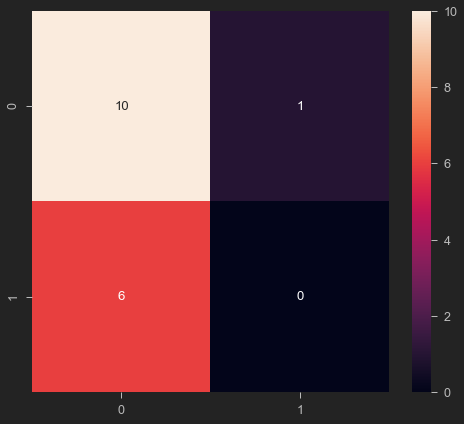

In [36]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))